In [110]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

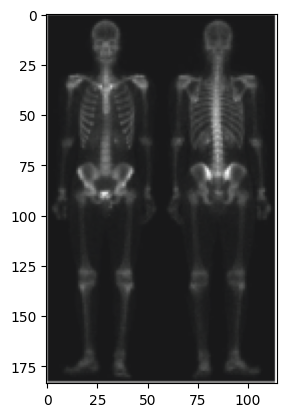

In [111]:
img = cv2.imread('./test01.png', cv2.CV_16UC4)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
plt.imshow(img);

In [112]:
mask1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
mask2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
mask3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

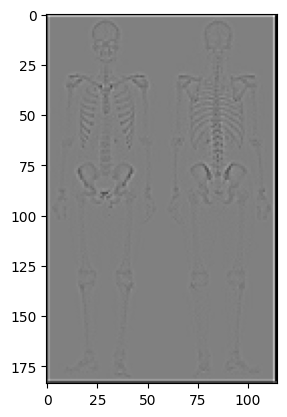

In [146]:
laplacian1 = cv2.filter2D(gray, -1, mask1)
laplacian2 = cv2.filter2D(gray, -1, mask2)
laplacian3 = cv2.filter2D(gray, -1, mask3)
laplacian4 = cv2.Laplacian(gray, cv2.CV_64F)
plt.imshow(laplacian4, cmap='gray');

In [147]:
sharpening_mask1 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpening_mask2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

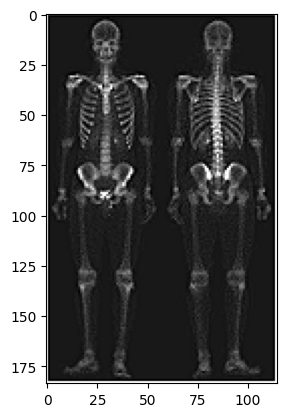

In [152]:
sharpening_out1 = cv2.filter2D(gray, -1, sharpening_mask1)
sharpening_out2 = cv2.filter2D(gray, -1, sharpening_mask2)

plt.imshow(sharpening_out2, cmap='gray');

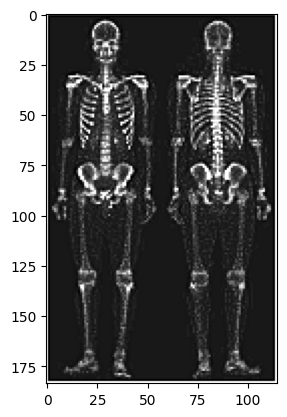

In [159]:
c_image = cv2.add(sharpening_out2, laplacian3)
plt.imshow(c_image, cmap='gray');

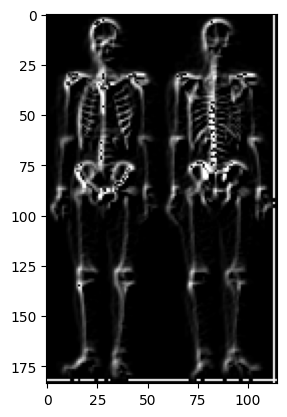

In [162]:
dx = np.abs(cv2.Sobel(gray, -1, 1, 0))
dy = np.abs(cv2.Sobel(gray, -1, 0, 1))
d_image = np.sqrt(np.add(np.multiply(dx, dx), np.multiply(dy, dy)));

# d_image = np.add(dx, dy)
plt.imshow(d_image, cmap='gray');

In [123]:
e_image = cv2.Sobel(d_image, cv2.CV_8U, 1, 0)
plt.imshow(img, cmap='gray');

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/deriv.cpp:96: error: (-215:Assertion failed) ktype == CV_32F || ktype == CV_64F in function 'getSobelKernels'
